In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# step 1 : load and print the dataset 

In [2]:
data=pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [3]:
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [4]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

# step 2 : Domain Analysis

# basic checks 

In [5]:
data.shape

(1200, 28)

In [6]:
data.head() # print first 5 rows

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [7]:
data.tail() # print last 5 rows

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


In [8]:
data.info()
# 1.There are total 1200 entries with 28 columns 
# 2. from 28 columns 19 columns having datatype integer and 9 columns having object datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [9]:
data.isnull().sum()
# there is no null data 

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [10]:
data.describe() # gives statistical analysis of columns having datatype integer

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [11]:
data.describe(include='object') # gives statistical analysis of columns having datatype object

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


In [4]:

# Categorical columns (usually object or category dtype)
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:",categorical_cols)





Categorical Columns: Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')


In [5]:
# Continuous columns (usually numeric)
continuous_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("nContinuous Columns:",continuous_cols)



nContinuous Columns: Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')


# step 3 : EDA ( Exploratory analysis)

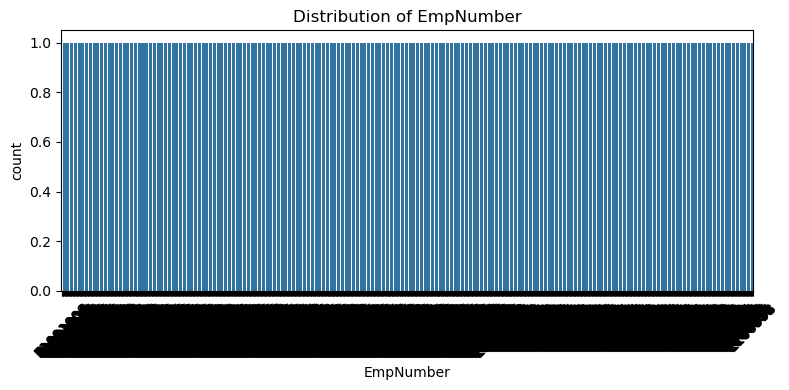

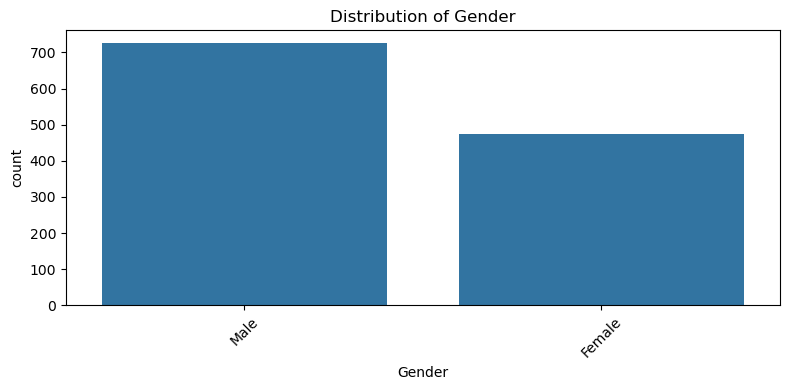

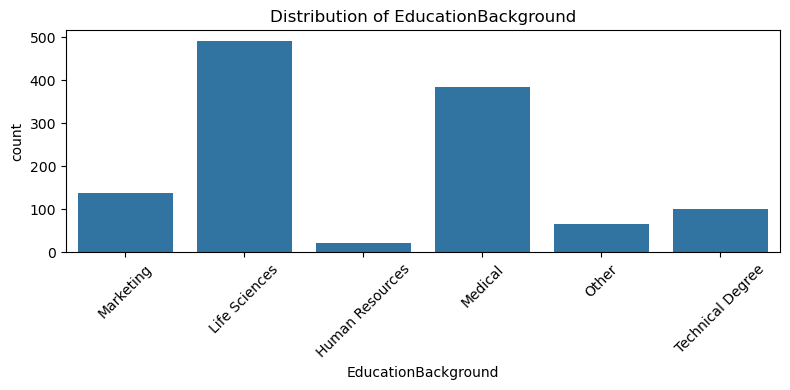

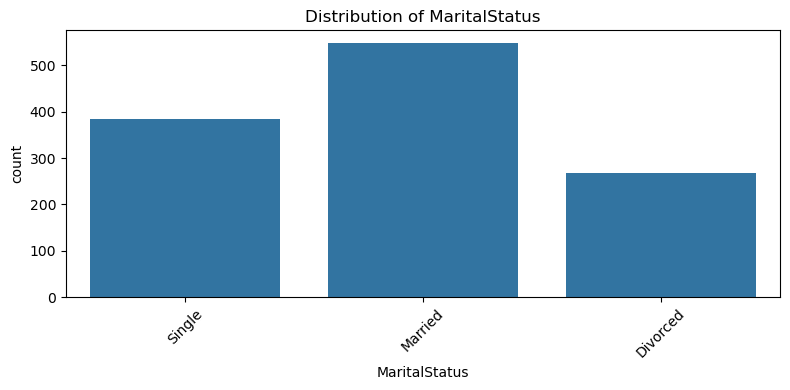

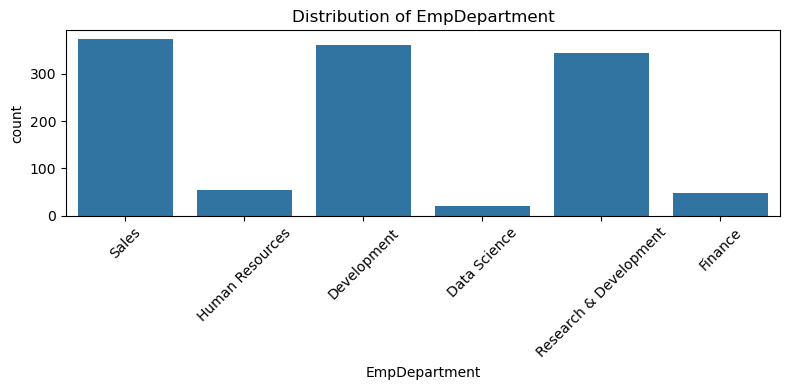

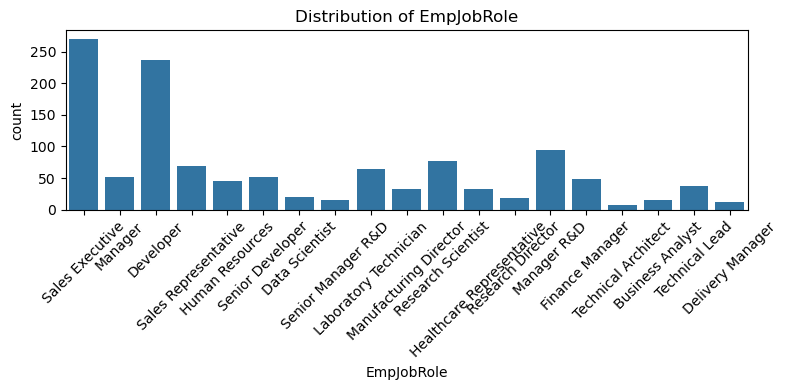

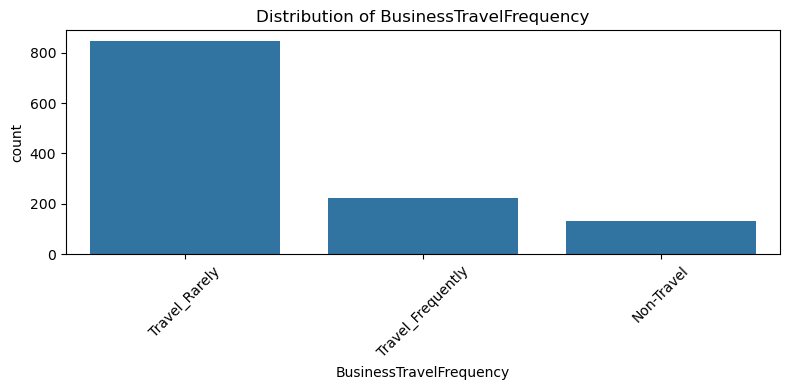

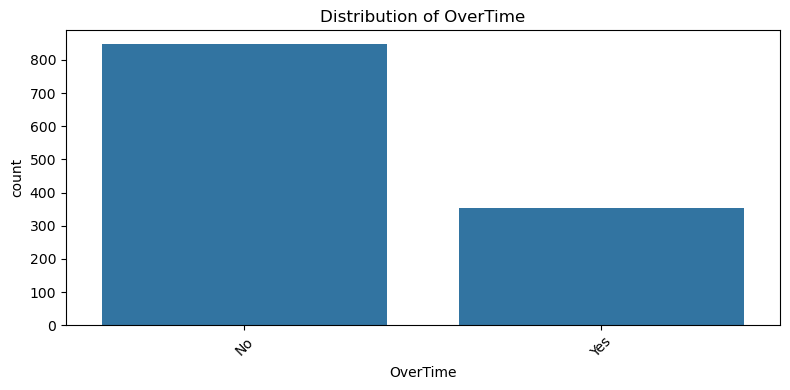

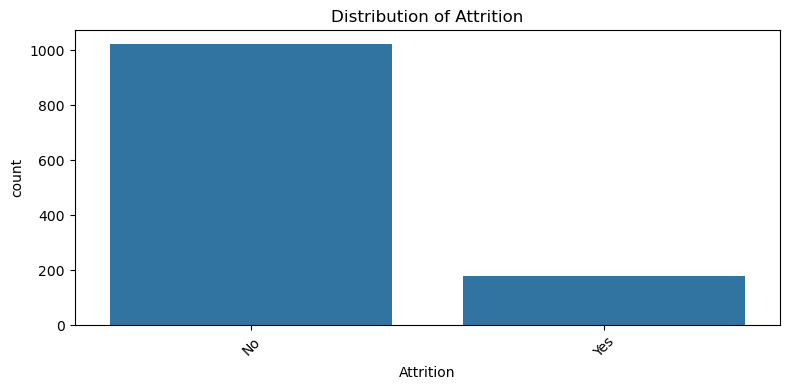

In [14]:

for col in categorical_cols:
    # Bar Plot
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Insights from above code :
1.EmpNumber:

-Insight: None needed; consider dropping it from plots and analysis.


2.Gender:

-Insight: Check if there is a gender imbalance.

Example: If the plot shows 70% Male and 30% Female, it may suggest a diversity gap.


3.EducationBackground:

-Insight: Shows the distribution of employees across education levels.

-Example: A large number in "Life Sciences" or "Medical" might show the preferred educational background for hiring.


4.MaritalStatus:

-Insight: Understand whether most employees are married, single, or divorced.

-Example: If most are "Married", it might be interesting to cross-analyze with Attrition.


5.EmpDepartment:

Insight: Displays how many employees work in each department.

Example: If "Research & Development" dominates, it may be the company’s core function.

6.EmpJobRole:

Insight: Helps identify the most common job roles.

Example: If "Sales Executive" or "Research Scientist" has the highest count, that might suggest a focus area.


7.BusinessTravelFrequency:

Insight: Frequency of travel among employees.

Example: If most travel is "Rarely", it might indicate a desk-job-heavy company structure.


8.OverTime:

Insight: Shows how many employees work overtime.

Example: A high count in "Yes" could be a red flag for work-life balance or a contributor to Attrition.


9.Attrition:

Insight: Shows the number of employees who have left (Yes) vs those who stayed (No).

Example: High attrition rate may indicate workplace dissatisfaction, stress, or poor retention strategies.



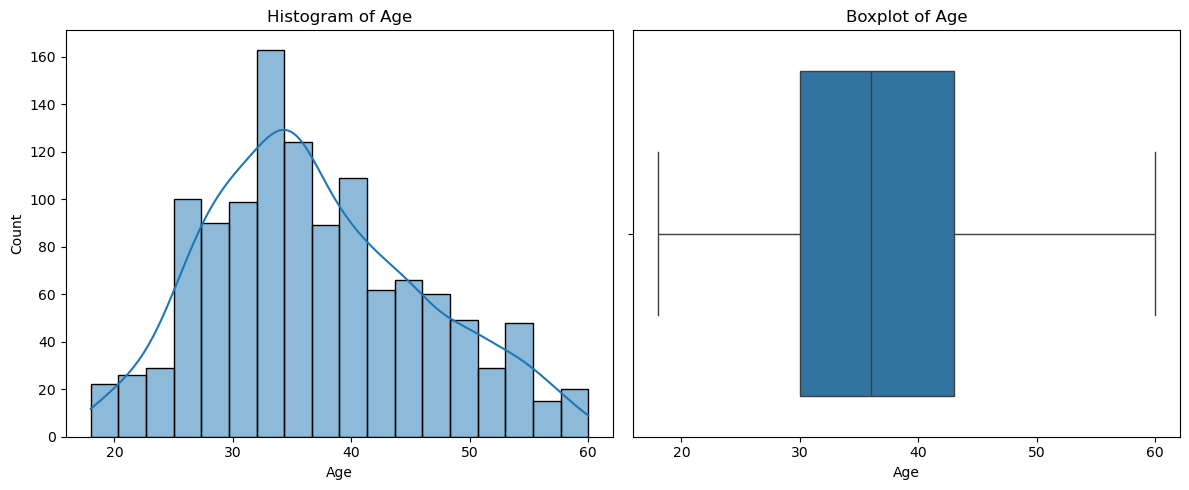

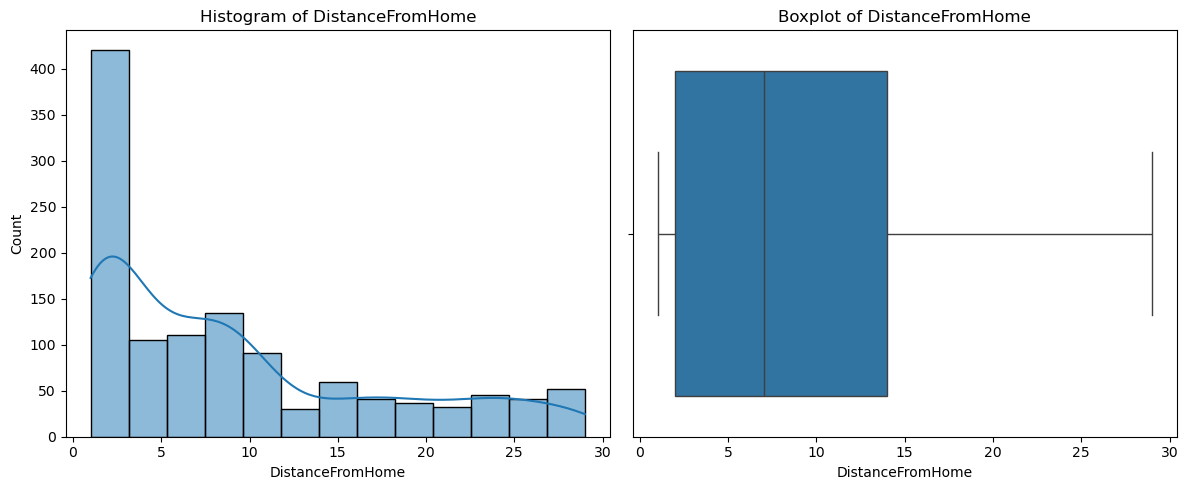

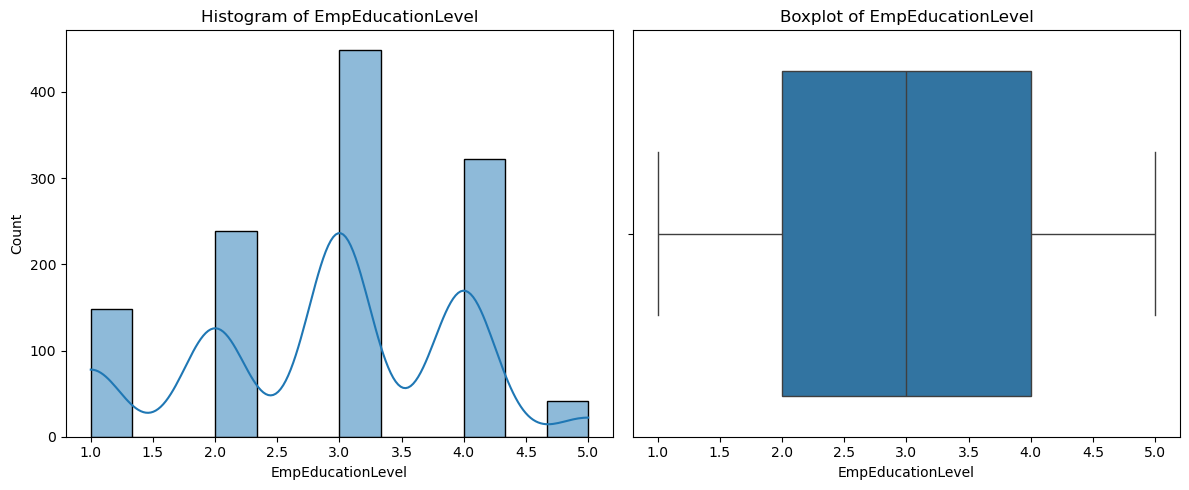

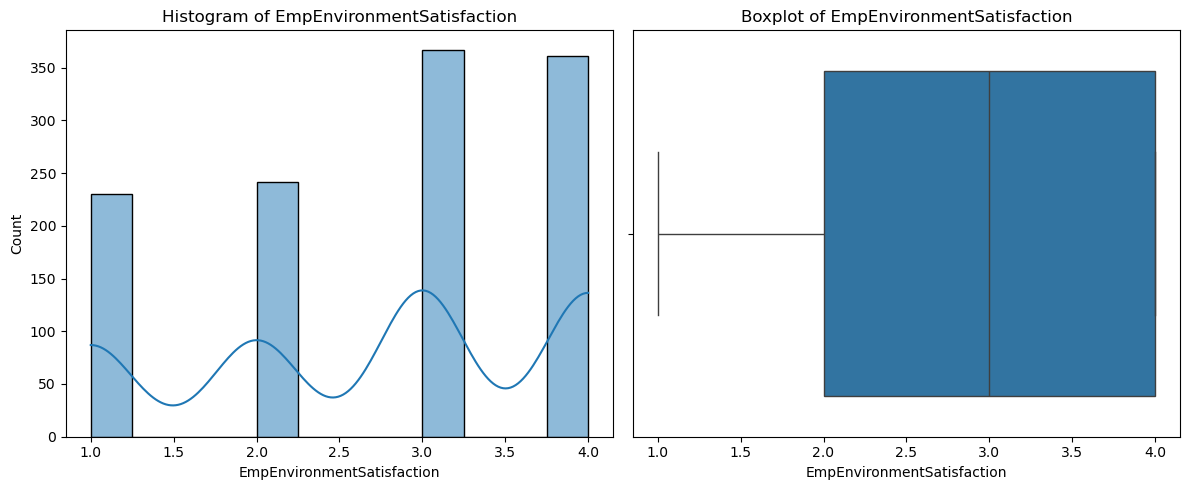

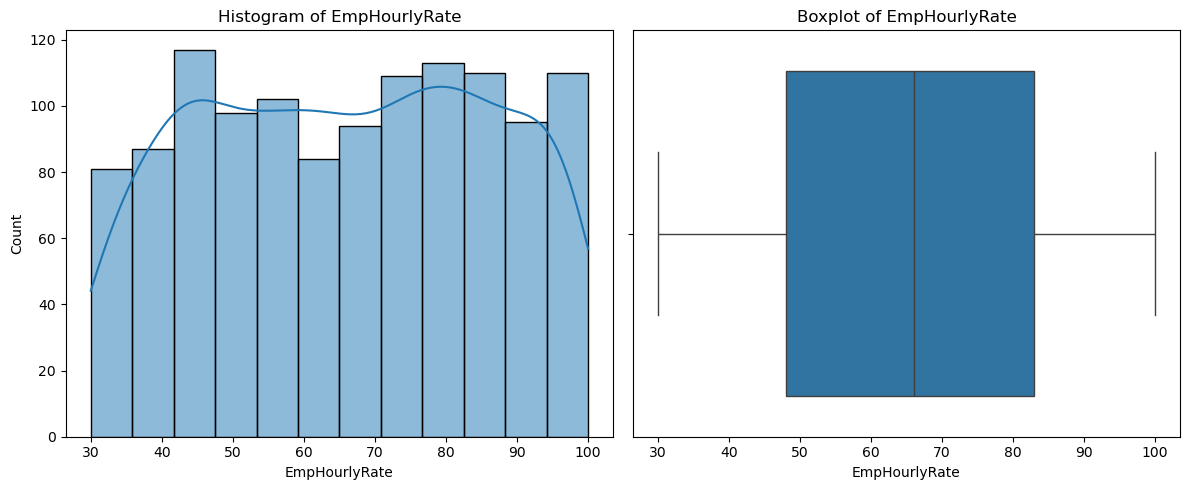

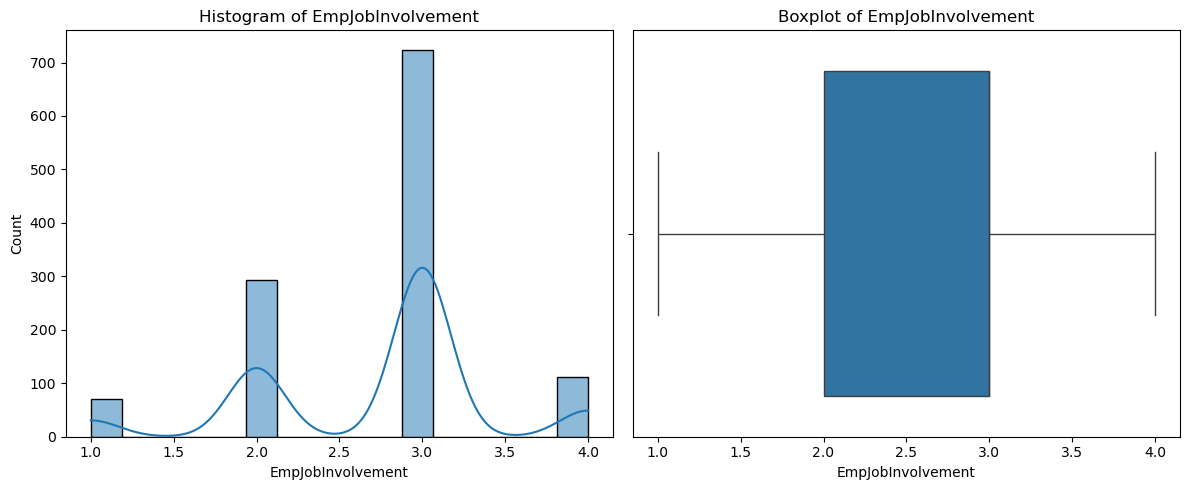

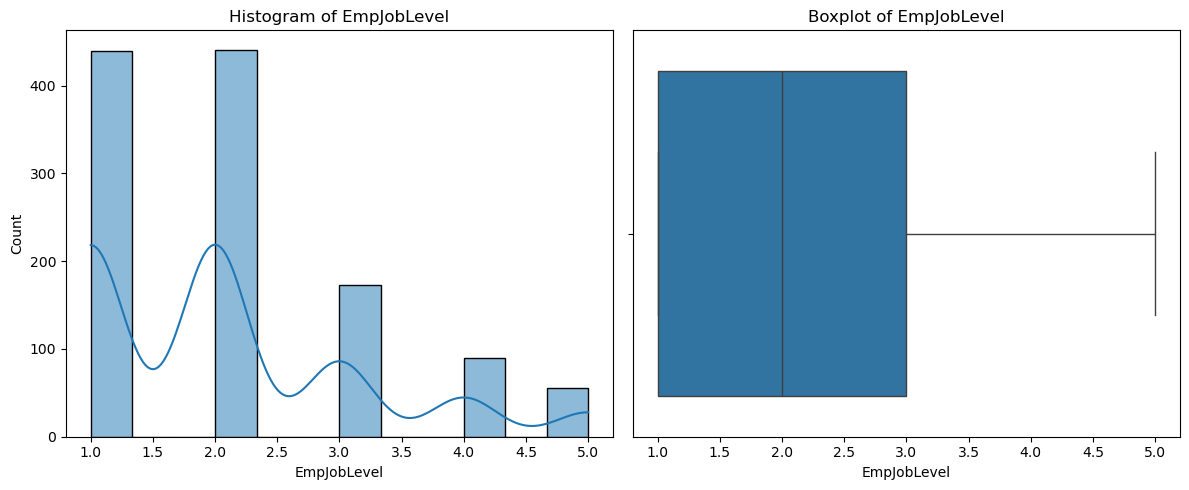

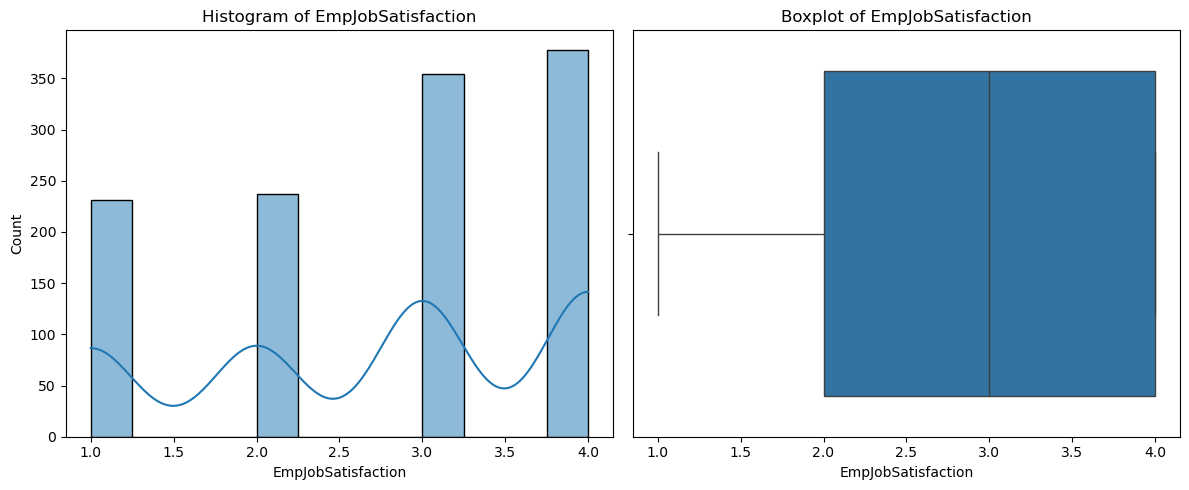

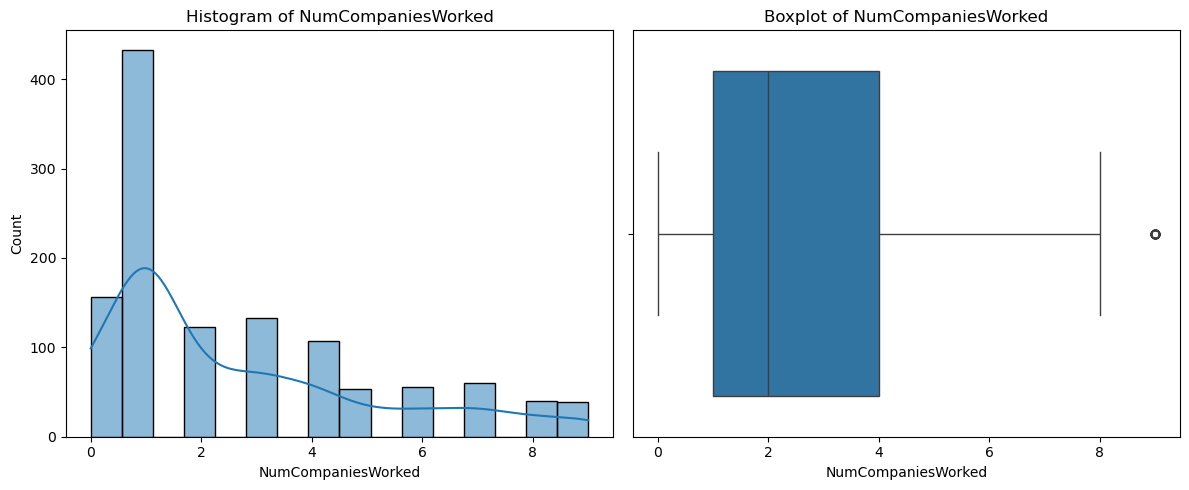

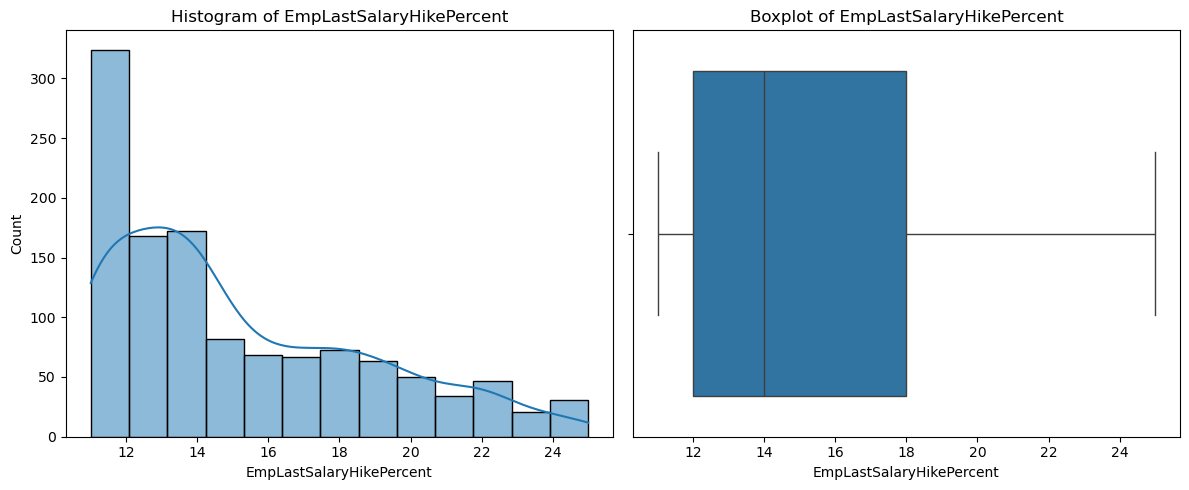

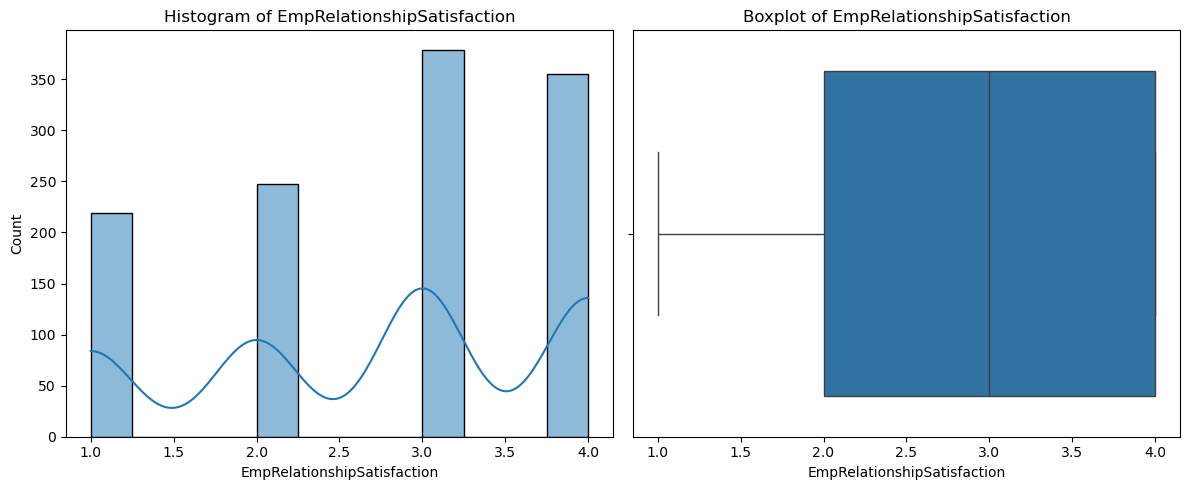

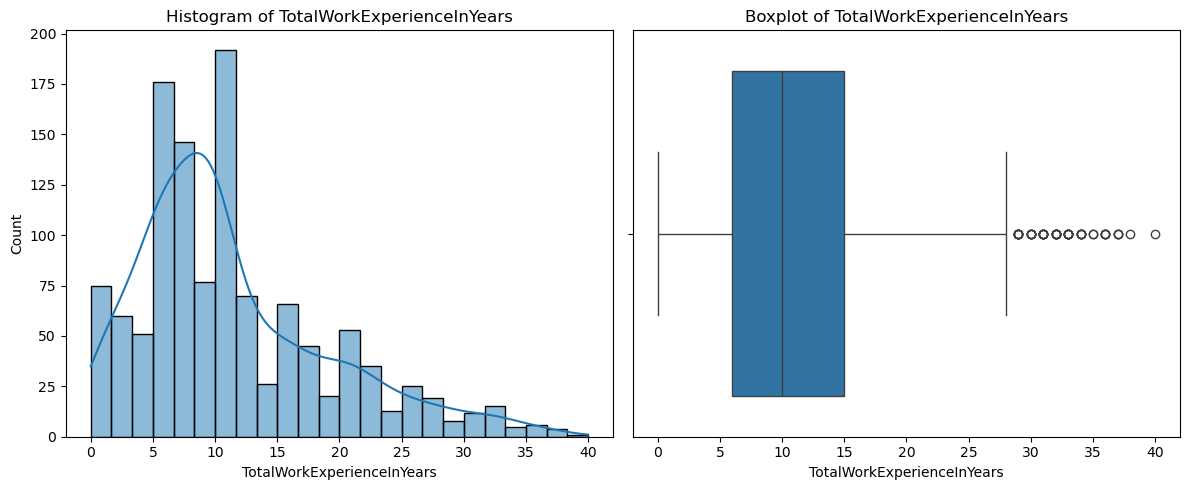

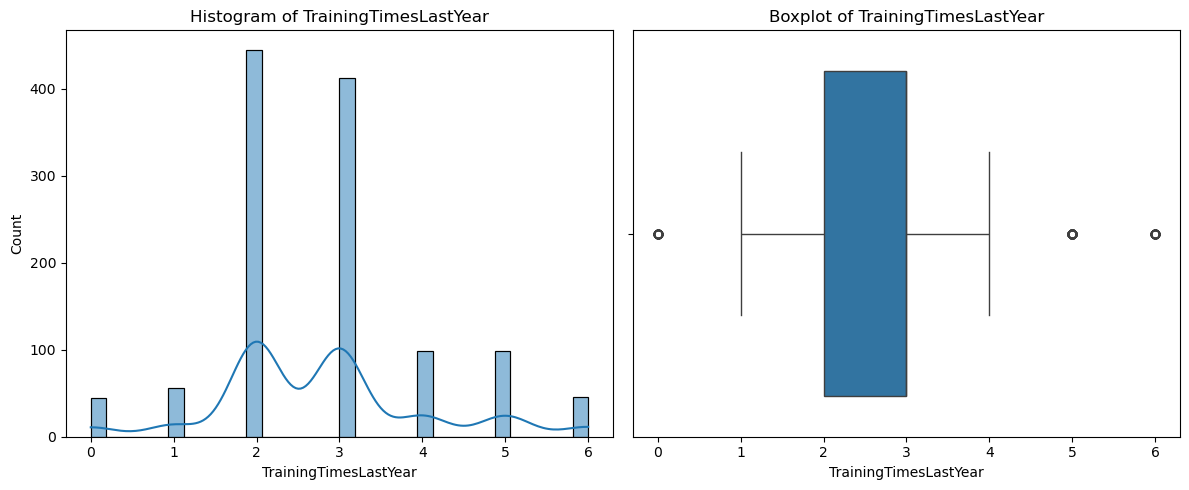

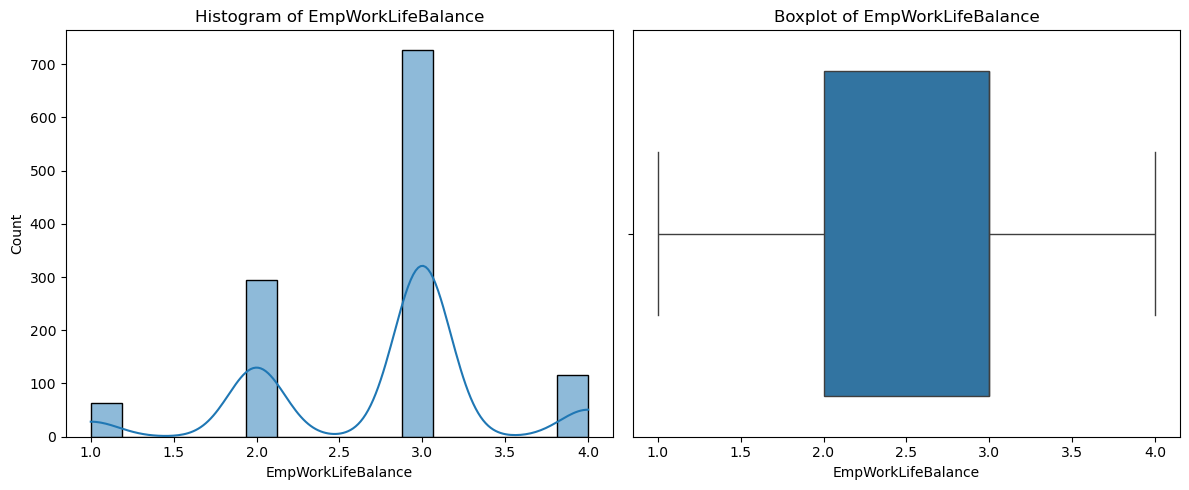

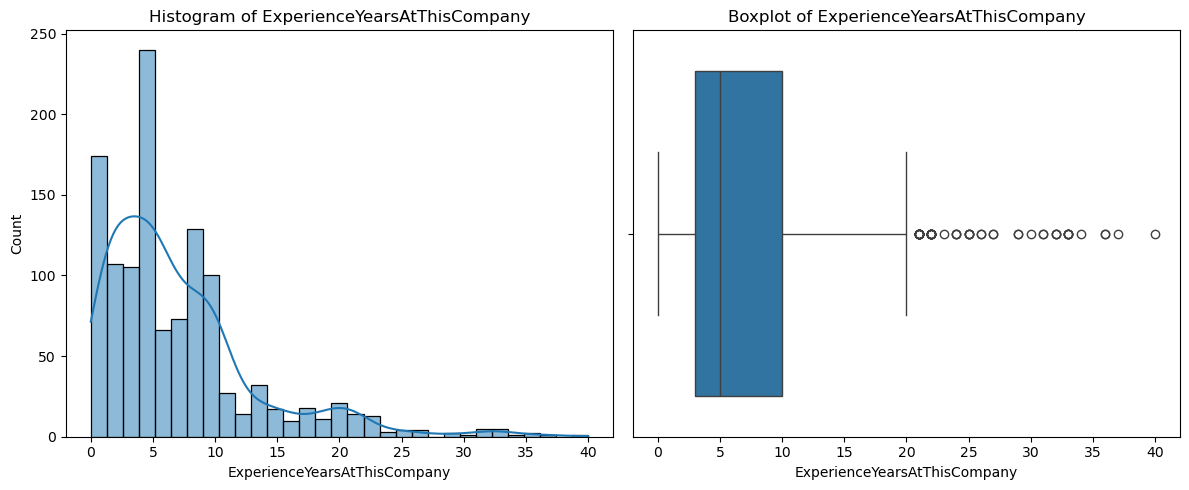

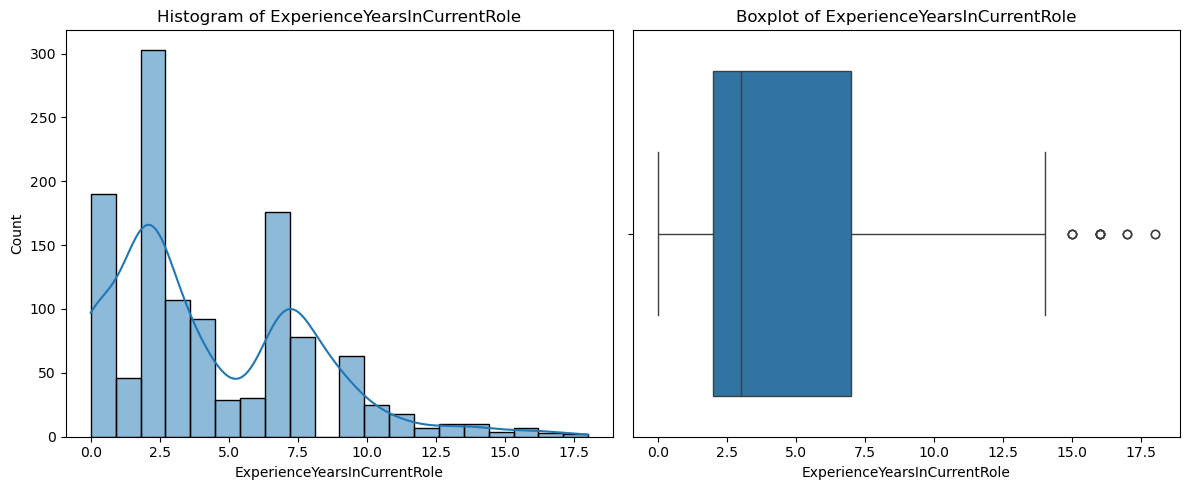

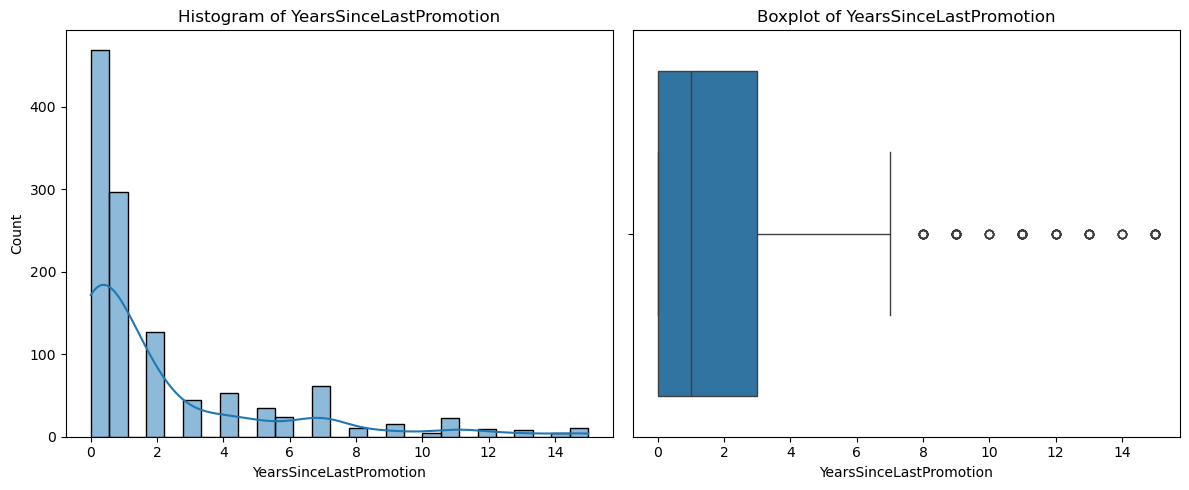

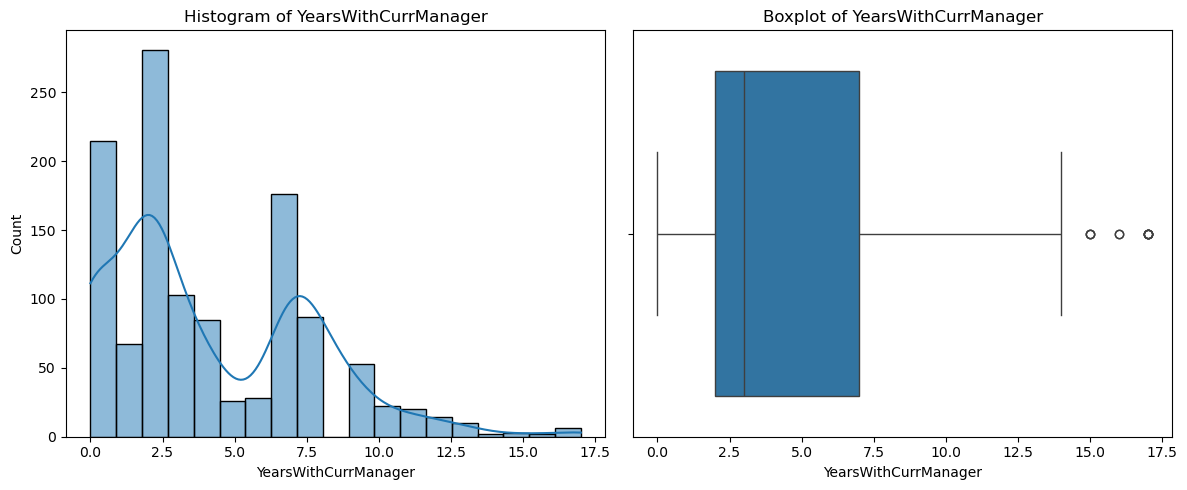

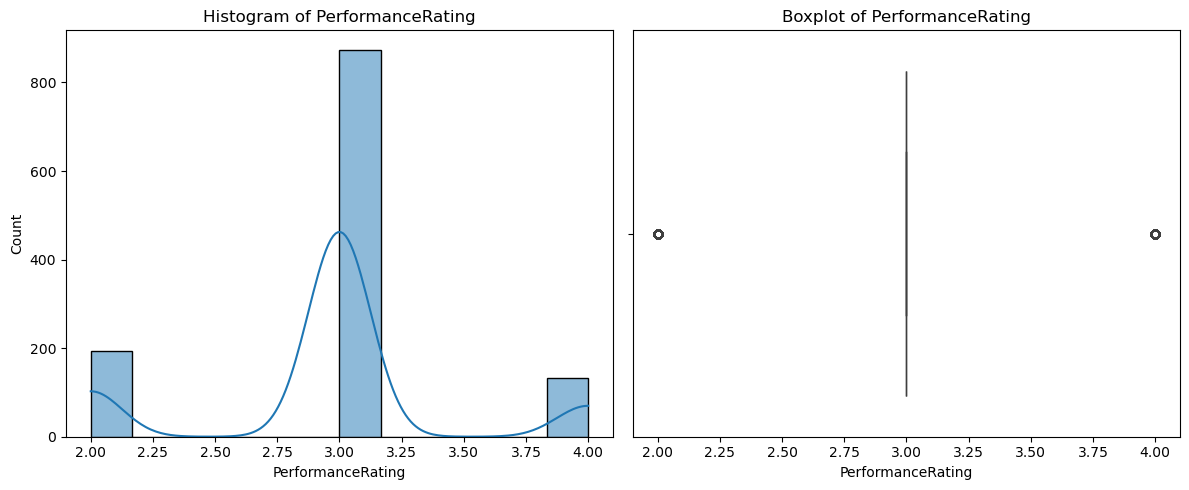

In [15]:

for col in continuous_cols:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f"Histogram of {col}")
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    
    plt.tight_layout()
    plt.show()


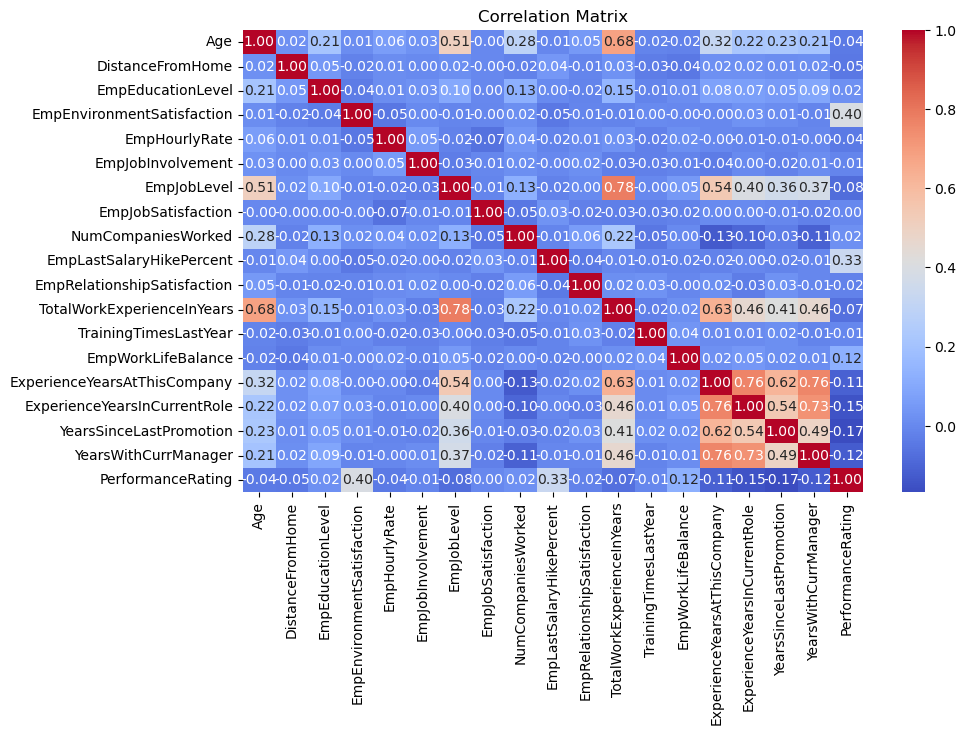

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[continuous_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
# we dont need to drop  or delete any features because all shows correlation less than 0.9

In [4]:
data.drop('EmpNumber',axis=1,inplace=True)

# step 4 : Feature Engineering :

In [5]:
data.isnull().sum() # there is no null value present

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [6]:
data.duplicated().sum() # there is no duplicate row

0

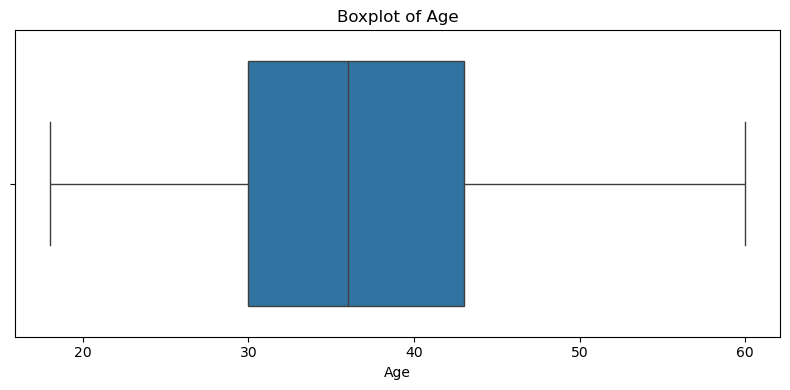

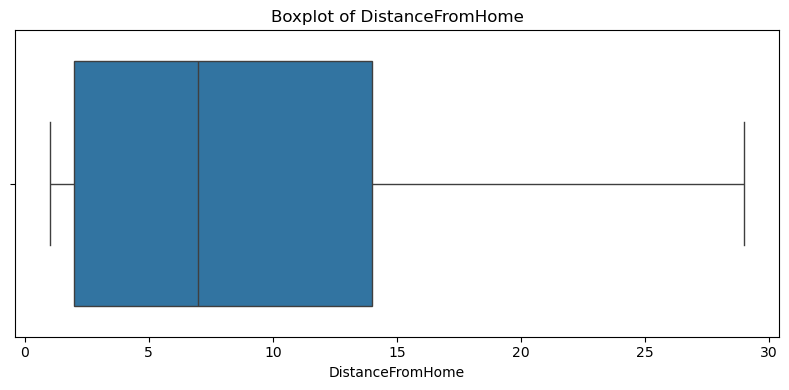

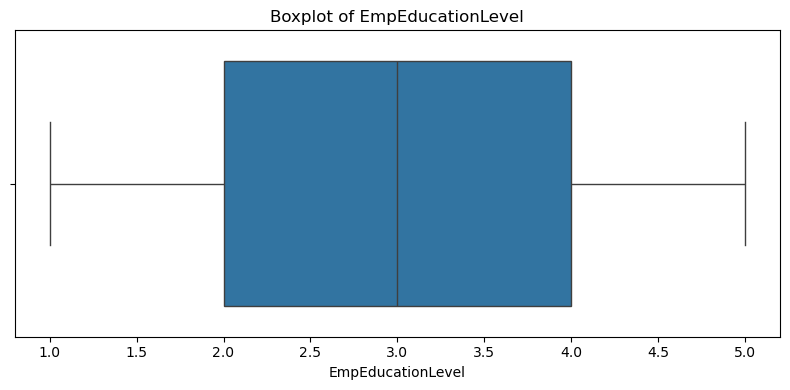

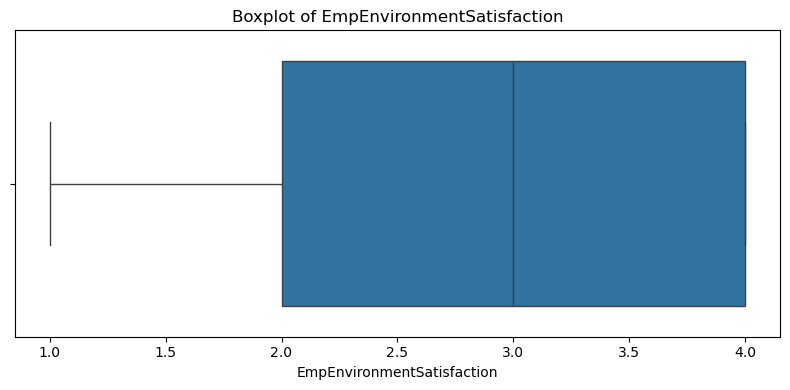

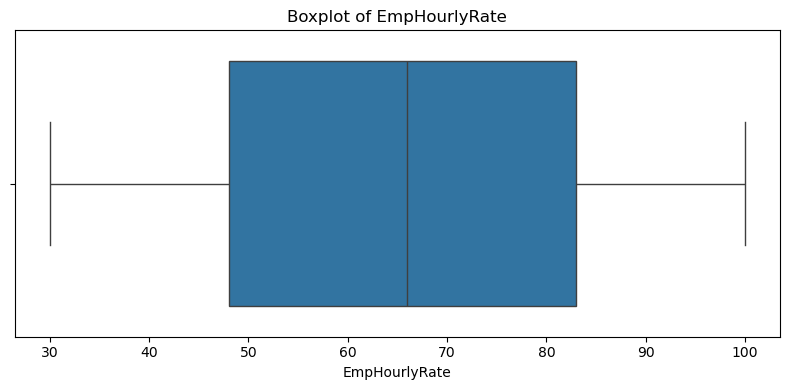

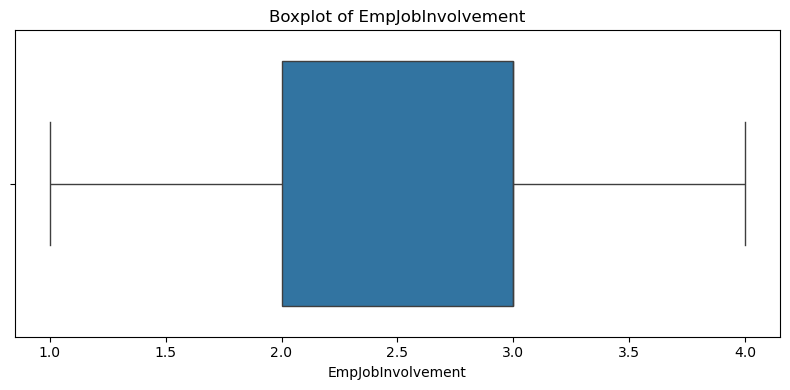

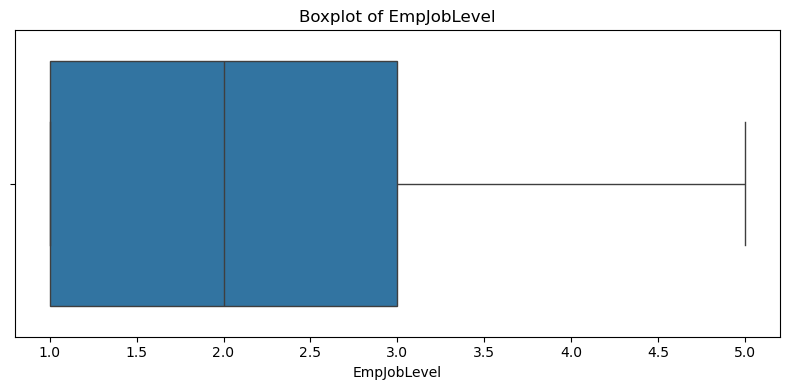

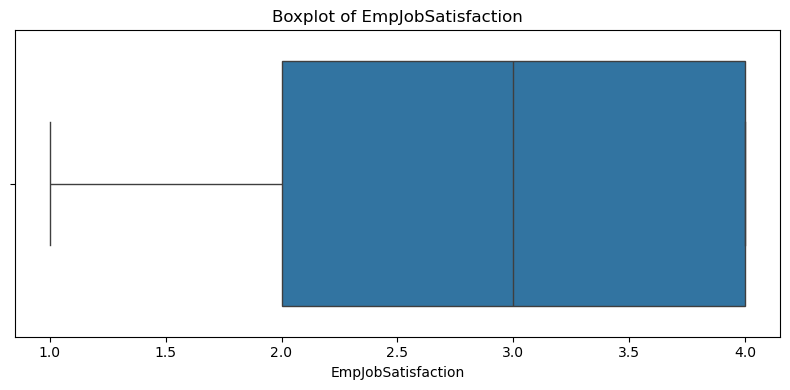

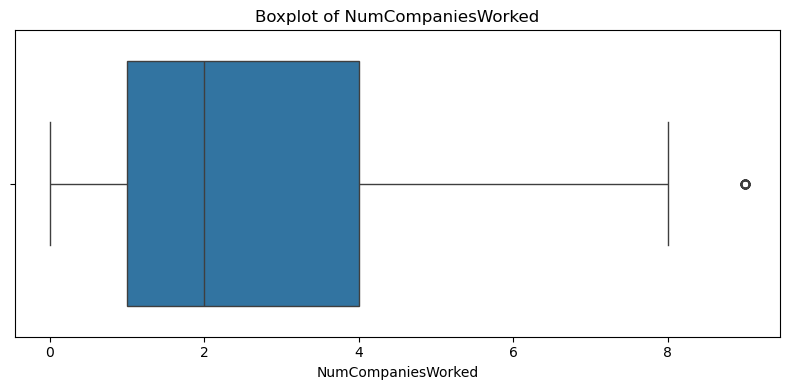

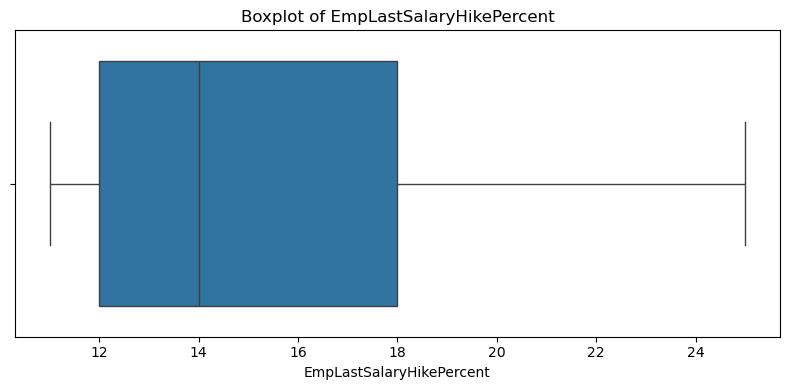

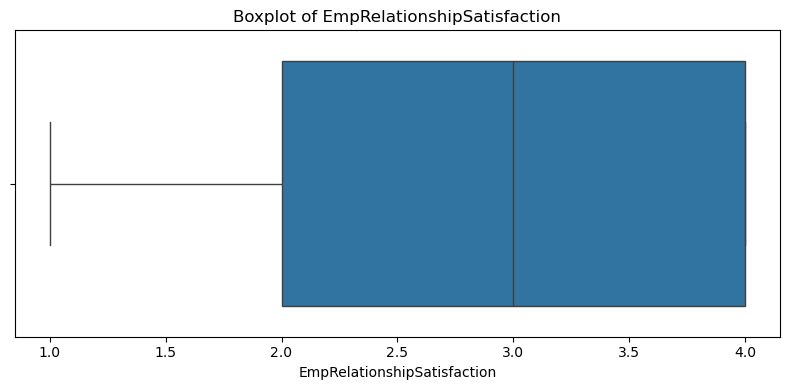

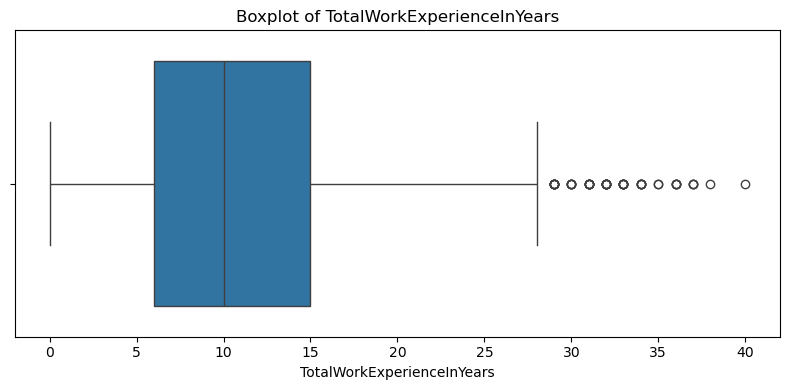

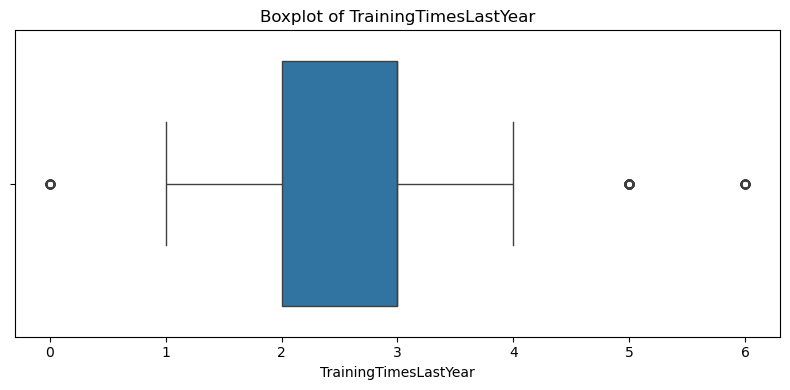

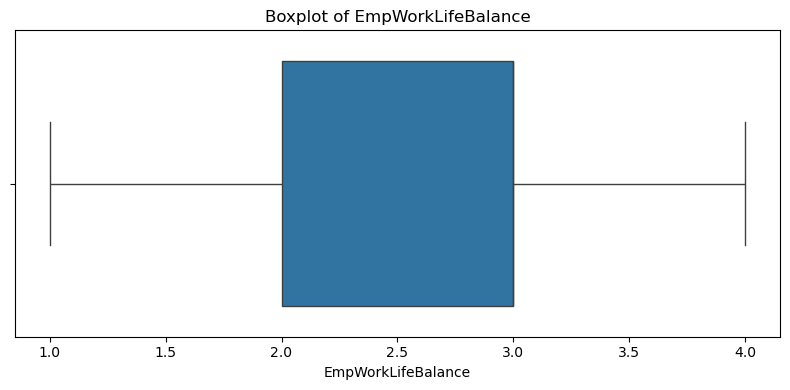

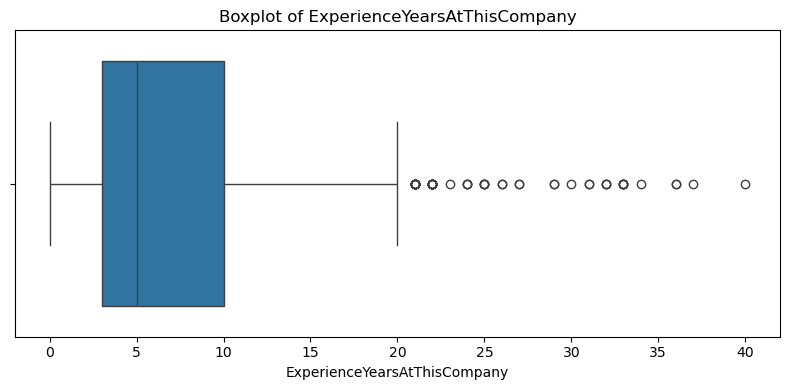

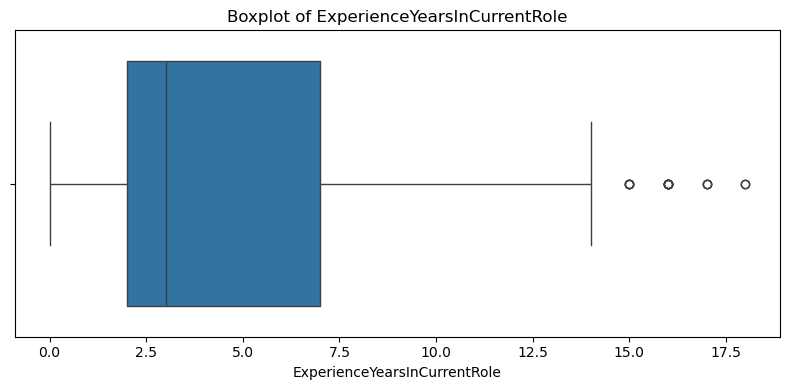

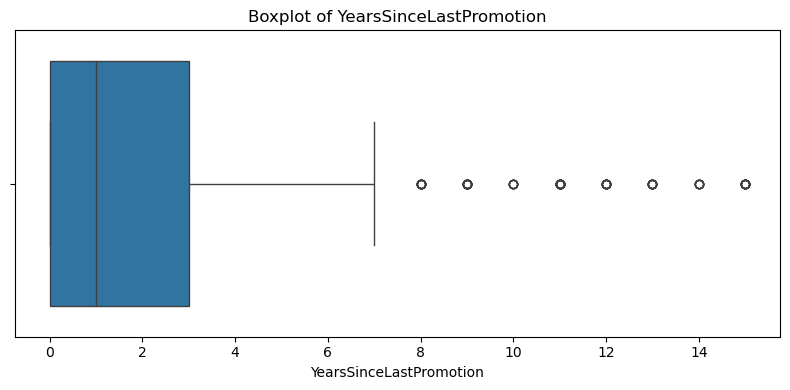

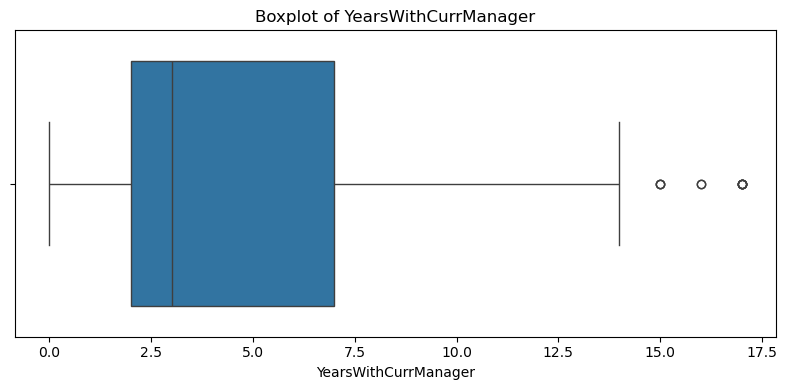

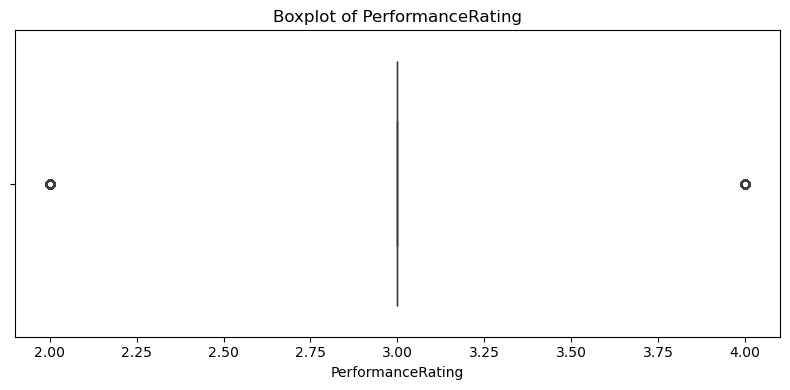

In [10]:

for col in continuous_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()


In [7]:
outlier_cols = [
    "NumCompaniesWorked",
    "TotalWorkExperienceInYears",
    "TrainingTimesLastYear",
    "ExperienceYearsAtThisCompany",
    "ExperienceYearsInCurrentRole",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager",
    "PerformanceRating"
]


In [8]:

# Make a copy before removing outliers
data_cleaned = data.copy()

for col in outlier_cols:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    data_cleaned = data_cleaned[(data_cleaned[col] >= lower_bound) & (data_cleaned[col] <= upper_bound)]

    print(f"{col}: Outliers removed. Remaining rows = {data_cleaned.shape[0]}")


NumCompaniesWorked: Outliers removed. Remaining rows = 1161
TotalWorkExperienceInYears: Outliers removed. Remaining rows = 1111
TrainingTimesLastYear: Outliers removed. Remaining rows = 936
ExperienceYearsAtThisCompany: Outliers removed. Remaining rows = 881
ExperienceYearsInCurrentRole: Outliers removed. Remaining rows = 877
YearsSinceLastPromotion: Outliers removed. Remaining rows = 783
YearsWithCurrManager: Outliers removed. Remaining rows = 772
PerformanceRating: Outliers removed. Remaining rows = 580


In [9]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in data.columns:
    data[col] = le.fit_transform(data[col])


In [10]:
data

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,14,1,2,2,5,13,2,9,2,3,...,3,10,2,1,10,7,0,8,0,1
1,29,1,2,2,5,13,2,13,3,3,...,3,20,2,2,7,7,1,7,0,1
2,22,1,1,1,5,13,1,4,3,3,...,2,20,2,2,18,13,1,12,0,2
3,23,1,0,0,3,8,2,9,3,1,...,1,23,2,1,21,6,12,6,0,1
4,42,1,2,2,5,13,2,15,3,0,...,3,10,1,2,2,2,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,9,0,3,0,5,13,1,2,0,3,...,1,6,3,2,6,5,0,4,0,2
1196,19,1,1,2,1,15,2,9,1,3,...,0,4,2,2,1,0,0,0,0,1
1197,32,1,3,1,1,15,2,27,0,3,...,2,20,3,2,20,8,3,8,0,1
1198,16,0,3,2,0,1,2,8,2,3,...,1,9,3,3,8,7,7,7,0,1


In [11]:
# cheking imbalance
data['PerformanceRating'].value_counts()


PerformanceRating
1    874
0    194
2    132
Name: count, dtype: int64

In [12]:
X = data.drop('PerformanceRating', axis=1)
y = data['PerformanceRating']


In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_new, y_new = smote.fit_resample(X, y)


# step 5 : perform train test split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)


In [15]:
X_test

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1161,7,1,3,1,5,14,2,12,0,1,...,0,2,7,1,2,7,4,0,6,0
70,8,0,3,1,1,3,1,4,1,2,...,3,0,8,2,2,8,7,1,7,1
1613,16,1,4,1,5,13,1,6,1,0,...,9,2,9,5,2,9,7,4,7,0
410,27,1,5,1,4,9,2,28,2,1,...,7,3,10,4,3,3,1,1,2,0
2270,16,0,2,1,5,13,0,12,2,2,...,13,0,10,2,2,8,7,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,6,1,4,1,1,3,2,16,1,3,...,10,3,1,2,2,1,0,0,0,0
1572,14,0,2,1,5,13,1,5,2,0,...,5,0,12,0,1,11,7,5,7,0
482,11,1,1,0,2,4,1,1,0,0,...,8,3,6,0,3,6,4,1,3,0
1117,32,1,1,1,1,15,2,28,3,1,...,4,1,28,2,2,27,10,15,7,0


In [16]:
y_test

1161    1
70      1
1613    0
410     1
2270    2
       ..
1159    2
1572    0
482     0
1117    1
438     2
Name: PerformanceRating, Length: 525, dtype: int64

In [17]:
X_train

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1760,7,1,2,1,4,6,2,0,1,1,...,0,1,4,2,1,4,3,1,2,0
1521,10,1,3,1,4,11,2,0,3,0,...,2,1,4,3,2,2,2,1,2,0
166,30,1,1,2,4,16,2,3,3,2,...,3,1,27,3,2,15,11,4,8,0
976,7,0,1,1,1,3,2,0,2,0,...,1,3,5,3,2,4,2,1,2,0
49,11,0,1,1,1,3,2,0,1,1,...,0,3,1,1,2,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,30,1,1,1,2,4,2,4,1,0,...,2,1,23,1,1,5,2,1,3,0
1095,12,0,5,2,5,13,2,11,2,1,...,0,1,6,6,2,5,4,4,4,0
1130,16,0,0,0,3,6,1,22,2,1,...,4,2,11,2,2,3,2,0,2,1
1294,27,0,3,1,4,10,2,0,1,0,...,1,2,13,3,1,7,5,3,4,0


# step 6 : apply model 

# 1.Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:
 # Predict and evaluate
y_pred = rf_model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, f1_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print("Accuracy score is:", acc)
print("f1 score is :", f1)
print("recall score is:", recall)
print("precision score is:", precision)

# Also good idea to print full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy score is: 0.9638095238095238
f1 score is : 0.9637048995916775
recall score is: 0.9638095238095238
precision score is: 0.9640385944640264

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       184
           1       0.97      0.94      0.95       173
           2       0.97      0.96      0.97       168

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X_new, y_new, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", scores)
print("Mean CV accuracy:", scores.mean())


Cross-validation accuracy scores: [0.91238095 0.96952381 0.97900763 0.95801527 0.95801527]
Mean CV accuracy: 0.9553885859687388


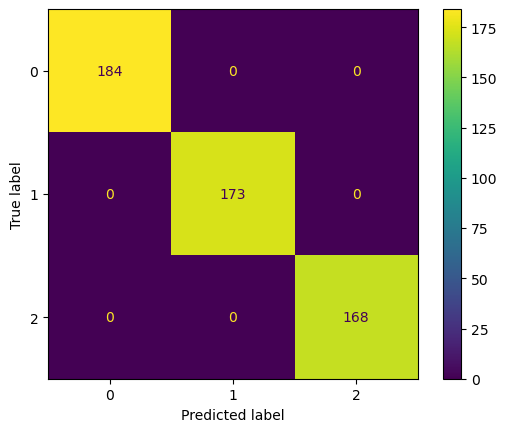

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


# 2.Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced', random_state=42, max_iter=1000)


In [25]:
log_model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial', random_state=42)

In [26]:
y_pred_log = log_model.predict(X_test)


In [27]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score

print("Accuracy Score:", accuracy_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log, average='weighted'))
print("Recall Score:", recall_score(y_test, y_pred_log, average='weighted'))
print("Precision Score:", precision_score(y_test, y_pred_log, average='weighted'))

print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


Accuracy Score: 0.8285714285714286
F1 Score: 0.827923431150741
Recall Score: 0.8285714285714286
Precision Score: 0.8288602296308957

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       184
           1       0.84      0.76      0.80       173
           2       0.83      0.86      0.84       168

    accuracy                           0.83       525
   macro avg       0.83      0.83      0.83       525
weighted avg       0.83      0.83      0.83       525



# 3.Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [30]:
y_pred_GB = log_model.predict(X_test)


In [32]:
print("Accuracy Score:", accuracy_score(y_test, y_pred_GB))
print("F1 Score:", f1_score(y_test, y_pred_GB, average='weighted'))
print("Recall Score:", recall_score(y_test, y_pred_GB, average='weighted'))
print("Precision Score:", precision_score(y_test, y_pred_GB, average='weighted'))

print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Accuracy Score: 0.8285714285714286
F1 Score: 0.827923431150741
Recall Score: 0.8285714285714286
Precision Score: 0.8288602296308957

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       184
           1       0.84      0.76      0.80       173
           2       0.83      0.86      0.84       168

    accuracy                           0.83       525
   macro avg       0.83      0.83      0.83       525
weighted avg       0.83      0.83      0.83       525



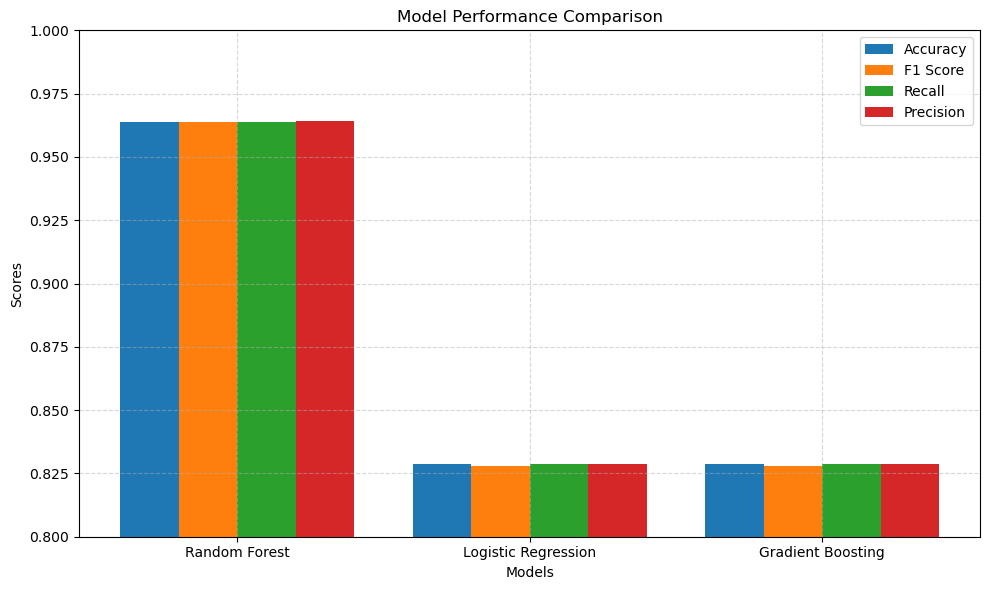

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models
models = ['Random Forest', 'Logistic Regression', 'Gradient Boosting']

# Define metrics
accuracy = [0.9638, 0.8286, 0.8286]
f1_score = [0.9637, 0.8279, 0.8279]
recall = [0.9638, 0.8286, 0.8286]
precision = [0.9640, 0.8289, 0.8289]

# Combine all scores
scores = np.array([accuracy, f1_score, recall, precision])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2
x = np.arange(len(models))

# Plot each metric
ax.bar(x - width*1.5, scores[0], width, label='Accuracy')
ax.bar(x - width*0.5, scores[1], width, label='F1 Score')
ax.bar(x + width*0.5, scores[2], width, label='Recall')
ax.bar(x + width*1.5, scores[3], width, label='Precision')

# Labels and formatting
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim([0.8, 1.0])
ax.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


# cheking performance of random forest model on testing data by giving some input

In [35]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Example input (raw format before encoding)
raw_input = {
    'Age': 32,
    'Gender': 'Male',
    'EducationBackground': 'Marketing',
    'MaritalStatus': 'Single',
    'EmpDepartment': 'Sales',
    'EmpJobRole': 'Sales Executive',
    'BusinessTravelFrequency': 'Travel_Rarely',
    'DistanceFromHome': 10,
    'EmpEducationLevel': 3,
    'EmpEnvironmentSatisfaction': 4,
    'EmpHourlyRate': 55,
    'EmpJobInvolvement': 3,
    'EmpJobLevel': 2,
    'EmpJobSatisfaction': 1,
    'OverTime': 'Yes',
    'EmpLastSalaryHikePercent': 15,
    'EmpRelationshipSatisfaction': 4,
    'TotalWorkExperienceInYears': 10,
    'TrainingTimesLastYear': 2,
    'EmpWorkLifeBalance': 3,
    'ExperienceYearsAtThisCompany': 10,
    'ExperienceYearsInCurrentRole': 7,
    'YearsSinceLastPromotion': 0,
    'YearsWithCurrManager': 8,
    'Attrition': 'No',
    'PerformanceRating': 3
}


In [36]:
from sklearn.preprocessing import LabelEncoder

# Define label encoders used during training
gender_encoder = LabelEncoder().fit(['Male', 'Female'])
education_encoder = LabelEncoder().fit(['Marketing', 'Life Sciences', 'Human Resources', 'Medical'])
marital_encoder = LabelEncoder().fit(['Single', 'Married', 'Divorced'])
dept_encoder = LabelEncoder().fit(['Sales', 'Development', 'Data Science', 'Human Resources'])
jobrole_encoder = LabelEncoder().fit(['Sales Executive', 'Senior Developer', 'Manager', 'Data Scientist'])
travel_encoder = LabelEncoder().fit(['Travel_Rarely', 'Travel_Frequently'])
overtime_encoder = LabelEncoder().fit(['No', 'Yes'])
attrition_encoder = LabelEncoder().fit(['No', 'Yes'])

# Encode the input row
encoded_input = [
    raw_input['Age'],
    gender_encoder.transform([raw_input['Gender']])[0],
    education_encoder.transform([raw_input['EducationBackground']])[0],
    marital_encoder.transform([raw_input['MaritalStatus']])[0],
    dept_encoder.transform([raw_input['EmpDepartment']])[0],
    jobrole_encoder.transform([raw_input['EmpJobRole']])[0],
    travel_encoder.transform([raw_input['BusinessTravelFrequency']])[0],
    raw_input['DistanceFromHome'],
    raw_input['EmpEducationLevel'],
    raw_input['EmpEnvironmentSatisfaction'],
    raw_input['EmpHourlyRate'],
    raw_input['EmpJobInvolvement'],
    raw_input['EmpJobLevel'],
    raw_input['EmpJobSatisfaction'],
    overtime_encoder.transform([raw_input['OverTime']])[0],
    raw_input['EmpLastSalaryHikePercent'],
    raw_input['EmpRelationshipSatisfaction'],
    raw_input['TotalWorkExperienceInYears'],
    raw_input['TrainingTimesLastYear'],
    raw_input['EmpWorkLifeBalance'],
    raw_input['ExperienceYearsAtThisCompany'],
    raw_input['ExperienceYearsInCurrentRole'],
    raw_input['YearsSinceLastPromotion'],
    raw_input['YearsWithCurrManager'],
    attrition_encoder.transform([raw_input['Attrition']])[0]
]

# Convert to NumPy array and reshape
encoded_input_array = np.array(encoded_input).reshape(1, -1)


In [39]:
import numpy as np

placeholder_value = 0  # or any integer if your model was trained on actual EmpNumber values
input_with_placeholder = np.insert(encoded_input_array, 0, placeholder_value, axis=1)

# Now input_with_placeholder has shape (1, 26)
prediction = rf_model.predict(input_with_placeholder)
print("Predicted Performance Rating:", prediction[0])



Predicted Performance Rating: 2


# conclusion